# Running phylogenetic workflows with ETE-build


## ete-build essentials



ETE3 has a built in helper tool to run phylogenetic workflows with a single command line: 'ete3 build'

Phylogenetic workflows are usually composed of 4 steps: 
    - sequence alignment
    - alignment cleaning/trimming
    - model-testing
    - tree inference. 
    
There are many tools and options to run each of those tasks. ETE has binding for some of the most common tools, so you can connect the steps very easily. 

For instance, you can tell ete-build to run a Mafft+FasTree workflow as simple as: 


```
#                              aligner      cleaner  tester    treebuilder
#                                   |           |     |          |
#                                   V           V     V          V
ete3 build   -a myFasta.faa   -w mafft_default-none-none-fasttree_default    -o output 

```

Or, if you want to add an alignmer timmer, you can simple add the desired task: 

```
#                              aligner      cleaner   tester    treebuilder
#                                   |           |       |          |
#                                   V           V       V          V
ete3 build   -a myFasta.faa   -w mafft_default-trimal01-none-fasttree_default    -o output 
``` 

You can obtain a list of available tasks, tools and options using: 

`ete3 build apps`

## Relevant docs

- [ete build cookbooks and examples](http://etetoolkit.org/cookbook/#Tree-building-(ete-build).



# Example of phylogeny reconstruction 

**TASK:** Infer a tree from our project using `ete3 build` and a mafft/fasttree workflow

In [30]:
%%time
%%bash 
# Let's generate the phylogeny for one of our families
ete3 build -a ../../data/fasta/224324.aq_013.faa -w mafft_default-none-none-fasttree_default \
           -o test_tree/ --clearall --compress -t 0.1 --launch-time 0.1


CPU times: user 3.65 ms, sys: 619 µs, total: 4.27 ms
Wall time: 14.9 s


**TASK:** Let's have a look at the tree inferred using `ete3 view`

In [25]:
!ete3 view -t test_tree/mafft_default-trimal01-none-fasttree_default/224324.aq_013.faa.final_tree.nw

test_tree/mafft_default-trimal01-none-fasttree_default/224324.aq_013.faa.final_tree.used_alg.fa


**TASK:** Visualize the tree and the alignment. Experiment with different visualization options of `ete3 view`

In [27]:
%%bash 
ete3 view -t test_tree/mafft_default-trimal01-none-fasttree_default/224324.aq_013.faa.final_tree.nw \
   --alg test_tree/mafft_default-trimal01-none-fasttree_default/224324.aq_013.faa.final_tree.used_alg.fa  \
   --alg_type fullseq


**TASK:** Generate a new tree using an alignment trimming option (e.g. trimal03), but keeping the same output directory `tree_test`. Explore other workflow variants.

- did you notice how tasks are reused?


In [31]:
%%time
%%bash
ete3 build -a ../../data/fasta/224324.aq_013.faa -w "mafft_default-trimal03-none-fasttree_default" \
           -o test_tree/ --clearall --compress --launch-time 0.1 -t 0.1

Toolchain path: /home/huerta/miniconda3/envs/eccb20/bin/ete3_apps/bin 
Toolchain version: unknown
['mafft_default-trimal03-none-fasttree_default']

      --------------------------------------------------------------------------------
                  ETE build (3.1.2) - reproducible phylogenetic workflows

      Citation:

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.4
      dialigntx: OK - This is DIALIGN-TX Version 1.0.2 - A Multiple Sequence alignment program.
       fasttree: OK - FastTree Version 2.1.8 

**TASK:** Explore the directory `test_tree`. You should have a subdir per workflow.

In [35]:
ls test_tree

db/                   mafft_default-none-none-fasttree_default/
ete_build.cfg         mafft_default-trimal01-none-fasttree_default/
etebuild_data.tar.gz  mafft_default-trimal03-none-fasttree_default/


Note that you can even provide multiple workflows at once, and common tasks will be reused. 


In [38]:
%%time
%%bash
ete3 build -a "../../data/fasta/224324.aq_013.faa" \
           -w "mafft_default-trimal01-none-fasttree_default" \
              "mafft_default-trimal03-none-fasttree_default" \
              "mafft_default-trimal05-none-fasttree_default" \
              "mafft_default-trimal05-none-fasttree_default" \
              "mafft_ginsi-trimal05-none-iqtree_default" \
           -o test_tree/ --clearall --compress --launch-time 0.1 -t 0.1

Toolchain path: /home/huerta/miniconda3/envs/eccb20/bin/ete3_apps/bin 
Toolchain version: unknown
['mafft_default-trimal01-none-fasttree_default']
['mafft_default-trimal03-none-fasttree_default']
['mafft_default-trimal05-none-fasttree_default']
['mafft_default-trimal05-none-fasttree_default']
['mafft_ginsi-trimal05-none-iqtree_default']

      --------------------------------------------------------------------------------
                  ETE build (3.1.2) - reproducible phylogenetic workflows

      Citation:

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  po

INFO -  Assembling final tree...CPU times: user 145 µs, sys: 9.42 ms, total: 9.57 ms
Wall time: 35.2 s


Let's have a look at the output dir: 

In [49]:
!ls --color test_tree/mafft_default-none-none-fasttree_default

224324.aq_013.faa.final_tree.fa       224324.aq_013.faa.final_tree.png.svg
224324.aq_013.faa.final_tree.nw       224324.aq_013.faa.final_tree.used_alg.fa
224324.aq_013.faa.final_tree.nwx      command_lines
224324.aq_013.faa.final_tree.png      commands.log
224324.aq_013.faa.final_tree.png.pdf  runid


**TASK:** Render a tree image for the result of each workflow

In [70]:
%%bash 
for WORKFLOW in `ls test_tree/|grep mafft`; 
    do 
    
      ete3 view -t test_tree/$WORKFLOW/224324.aq_013.faa.final_tree.nw \
               --alg test_tree/$WORKFLOW/224324.aq_013.faa.final_tree.used_alg.fa  \
               --alg_type fullseq -i $WORKFLOW.tree.png
done
   

Display all the tree and alg images

mafft_default-none-none-fasttree_default.tree.png


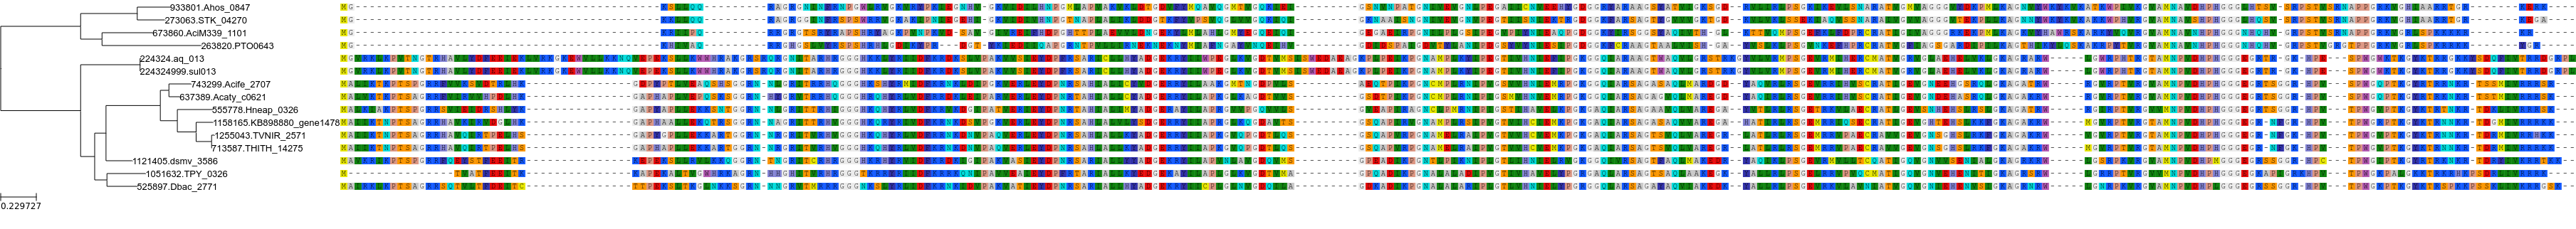

mafft_default-trimal01-none-fasttree_default.tree.png


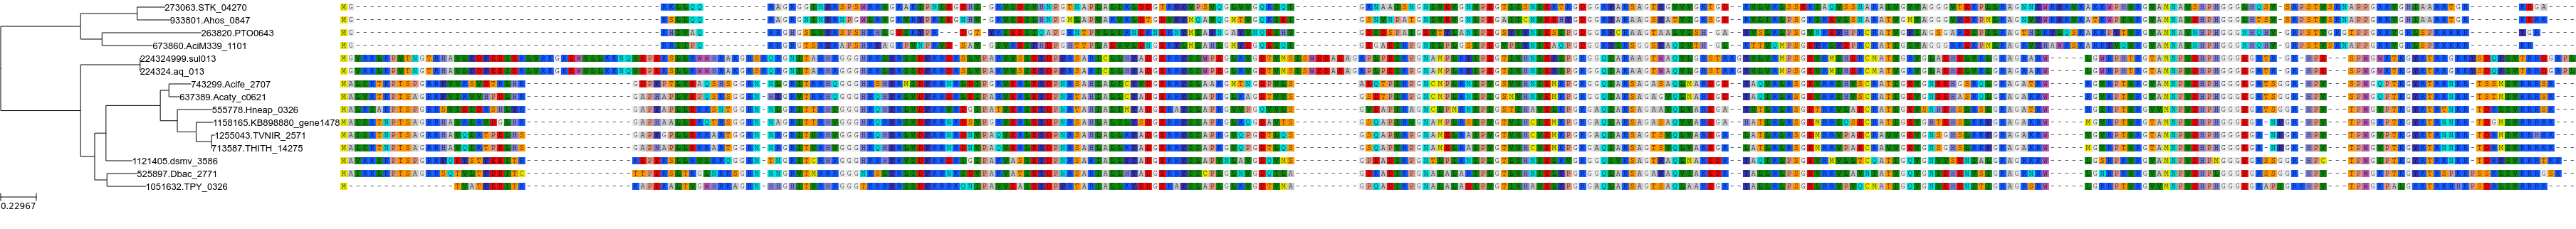

mafft_default-trimal03-none-fasttree_default.tree.png


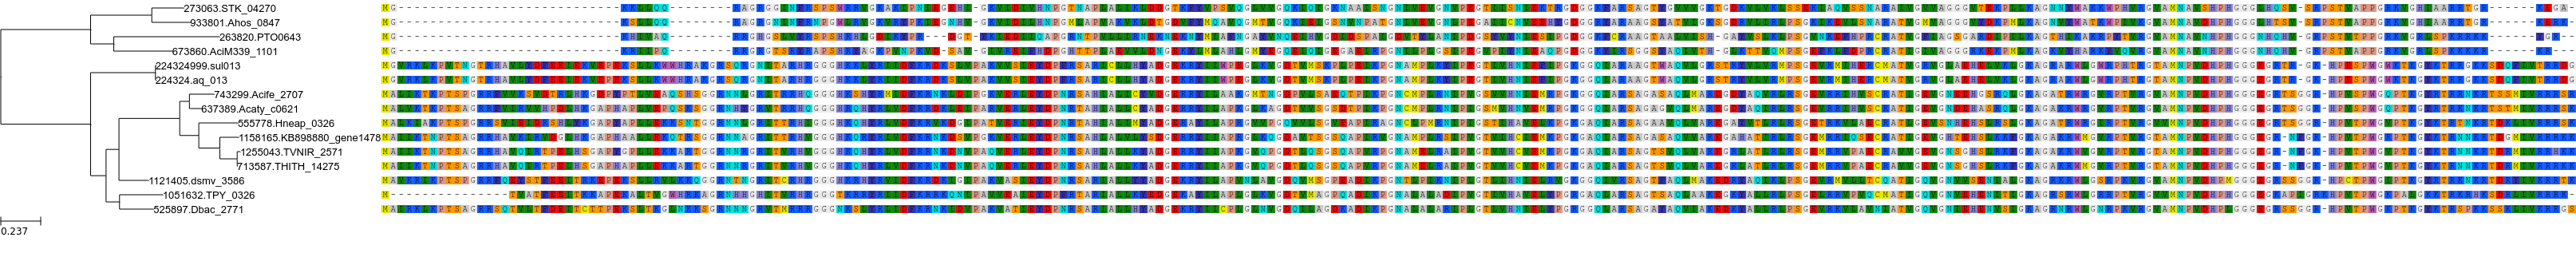

mafft_default-trimal05-none-fasttree_default.tree.png


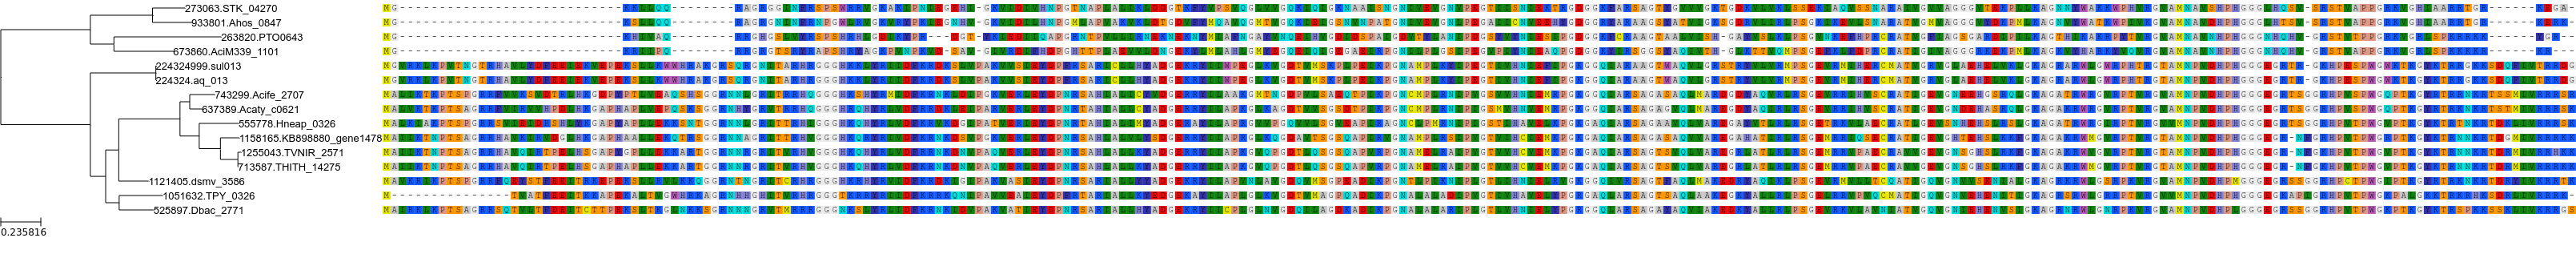

mafft_ginsi-trimal05-none-iqtree_default.tree.png


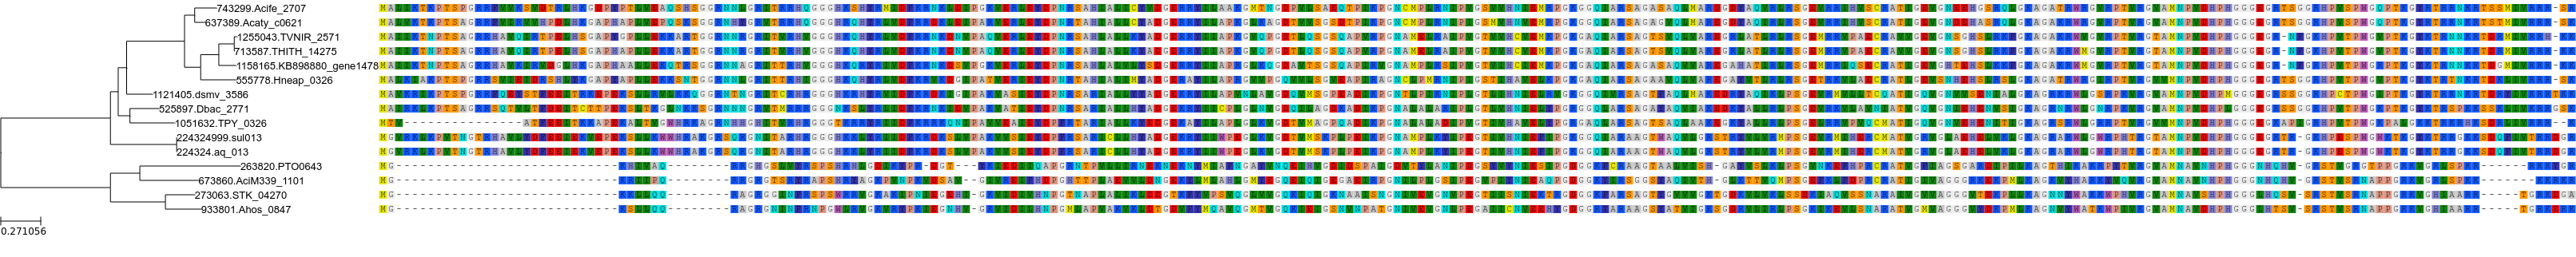

In [77]:
from IPython.display import Image
from glob import glob
for img in sorted(glob("*.png")):
    print(img)
    display(Image(img))

# Automate the reconstruction of all phylogenies

## Generate a list of target fasta

Given we want to automate the inference of many trees, let's first create a list of target families. 

Note that we only keep track of the base file name of each family (without the file extension). 


In [2]:
%%bash  
# generate a list of target families (by basename) and save it in data/target_families.txt

cd data/fasta/
for f in `ls -Sr *.faa`; 
   do 
       echo "${f%.*}"; # Printe file name without extension
done > ../target_families.txt
cd ../../

Check that the format is right

In [2]:
!head data/target_families.txt

555778.Hneap_0082
263820.PTO0205
713587.THITH_07030
1255043.TVNIR_2000
273063.STK_04195
273063.STK_15495
555778.Hneap_1287
273063.STK_03105
273063.STK_03625
1255043.TVNIR_0266


Check how many families we have

In [7]:
!wc -l data/target_families.txt

2672 data/target_families.txt


## Run ete-build for each FASTA file

In [10]:
%%bash 

# Compute all trees (NOTE:Remove the `echo` command to actually run the program)
for fname in `cat data/target_families.txt`: 
    do
        echo ete3 build -a data/fasta/$fname.faa -w mafft_default-none-none-fasttree_default \
               -o data/phylo/$fname -t 0.1 --launch-time 0.1 --nocheck --clearall --compress 
done               

# If you can sveral CPU cores in your machine, you can parellelize using parallels
# cat fasta/target_families.txt | parallel -j5 ete3 build -a fasta/{}.faa -w mafft_default-none-none-fasttree_default -o phylo/{} -t 0.1 --launch-time 0.1 --nocheck --clearall --compress 



ete3 build -a data/fasta/555778.Hneap_0082.faa -w mafft_default-none-none-fasttree_default -o data/phylo/555778.Hneap_0082 -t 0.1 --launch-time 0.1 --nocheck --clearall --compress
ete3 build -a data/fasta/263820.PTO0205.faa -w mafft_default-none-none-fasttree_default -o data/phylo/263820.PTO0205 -t 0.1 --launch-time 0.1 --nocheck --clearall --compress
ete3 build -a data/fasta/713587.THITH_07030.faa -w mafft_default-none-none-fasttree_default -o data/phylo/713587.THITH_07030 -t 0.1 --launch-time 0.1 --nocheck --clearall --compress
ete3 build -a data/fasta/1255043.TVNIR_2000.faa -w mafft_default-none-none-fasttree_default -o data/phylo/1255043.TVNIR_2000 -t 0.1 --launch-time 0.1 --nocheck --clearall --compress
ete3 build -a data/fasta/273063.STK_04195.faa -w mafft_default-none-none-fasttree_default -o data/phylo/273063.STK_04195 -t 0.1 --launch-time 0.1 --nocheck --clearall --compress
ete3 build -a data/fasta/273063.STK_15495.faa -w mafft_default-none-none-fasttree_default -o data/phylo/